# Heart disease prediction using Machine learning model

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('E:\DATA SCIENCE\LMS\PROJECT\heart_2020_cleaned.csv')

# Exploratory Data Analysis 

In [3]:
#1. Shape of dataset.It describe structure of dataset.We can see that dataset as 319795 observations and 18 features
dataset.shape

(319795, 18)

In [4]:
#2. Datatypes of all columns/features
dataset.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [5]:
# we will also use dataset.info() command which shows count of datatypes avaliable.In this case 4 features are of type numerical(float) and 14 features are categorical(object)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [6]:
# 3. Display dataset
dataset.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [7]:
dataset.tail(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319785,No,31.93,No,Yes,No,0.0,0.0,No,Male,65-69,Hispanic,No,Yes,Good,7.0,No,No,No
319786,Yes,33.20,Yes,No,No,0.0,0.0,No,Female,60-64,Hispanic,Yes,Yes,Very good,8.0,Yes,No,No
319787,No,36.54,No,No,No,7.0,0.0,No,Male,30-34,Hispanic,No,No,Good,9.0,No,No,No
319788,No,23.38,No,No,No,0.0,0.0,No,Female,60-64,Hispanic,No,Yes,Excellent,6.0,No,No,No
319789,No,22.22,No,No,No,0.0,0.0,No,Female,18-24,Hispanic,No,Yes,Excellent,8.0,No,No,No
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No


In [8]:
dataset.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

<AxesSubplot:>

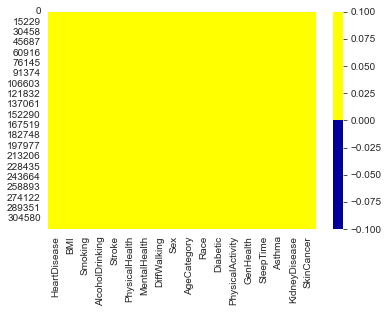

In [9]:
# Missing value imputation
import seaborn as sns
cols = dataset.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is not missing. blue is missing.
sns.heatmap(dataset[cols].isnull(), cmap=sns.color_palette(colours))

In [10]:
duplicate = dataset.duplicated()
print(duplicate.sum())
dataset[duplicate]

18078


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
2182,No,19.85,No,No,No,0.0,0.0,No,Female,80 or older,White,No,Yes,Excellent,7.0,No,No,No
3182,No,28.19,No,No,No,0.0,0.0,No,Female,50-54,White,No,Yes,Excellent,7.0,No,No,No
3397,No,26.54,No,No,No,0.0,0.0,No,Male,45-49,White,No,Yes,Excellent,6.0,No,No,No
3650,No,32.89,Yes,No,No,2.0,1.0,No,Female,50-54,White,No,Yes,Good,9.0,No,No,No
4061,No,25.84,No,No,No,0.0,0.0,No,Female,40-44,White,No,Yes,Excellent,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319671,No,25.06,No,No,No,0.0,0.0,No,Male,40-44,Hispanic,No,Yes,Excellent,7.0,No,No,No
319689,No,27.44,No,No,No,0.0,0.0,No,Female,30-34,Hispanic,No,Yes,Very good,6.0,No,No,No
319726,No,30.41,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,7.0,No,No,No
319751,No,34.96,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,6.0,No,No,No


In [11]:
# Upto this no issue is identified with any column value.No null as well as missing value observed in this dataset.
dataset.sample(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
8782,No,32.59,Yes,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,5.0,No,No,Yes
91721,No,23.89,Yes,No,No,0.0,0.0,No,Female,55-59,White,No,Yes,Good,6.0,No,No,No
226006,No,30.85,Yes,No,No,0.0,5.0,No,Male,60-64,White,No,No,Good,9.0,No,No,No
261090,No,32.24,No,No,No,0.0,4.0,No,Female,65-69,White,Yes,No,Good,7.0,No,No,No
273516,No,22.15,Yes,No,No,0.0,0.0,No,Male,65-69,White,No,Yes,Very good,8.0,No,No,No
192972,Yes,32.55,No,No,Yes,30.0,0.0,Yes,Female,75-79,White,Yes,No,Poor,10.0,No,No,No
144136,No,20.78,No,No,No,2.0,0.0,No,Female,60-64,White,No,Yes,Fair,6.0,Yes,No,No
224927,No,24.51,No,No,No,0.0,0.0,No,Female,45-49,White,No,Yes,Excellent,8.0,No,No,No
23862,No,20.12,Yes,No,No,0.0,0.0,No,Female,70-74,White,No,Yes,Fair,8.0,Yes,No,No
18175,No,25.73,Yes,No,No,0.0,1.0,No,Male,45-49,White,No,Yes,Excellent,8.0,Yes,No,No


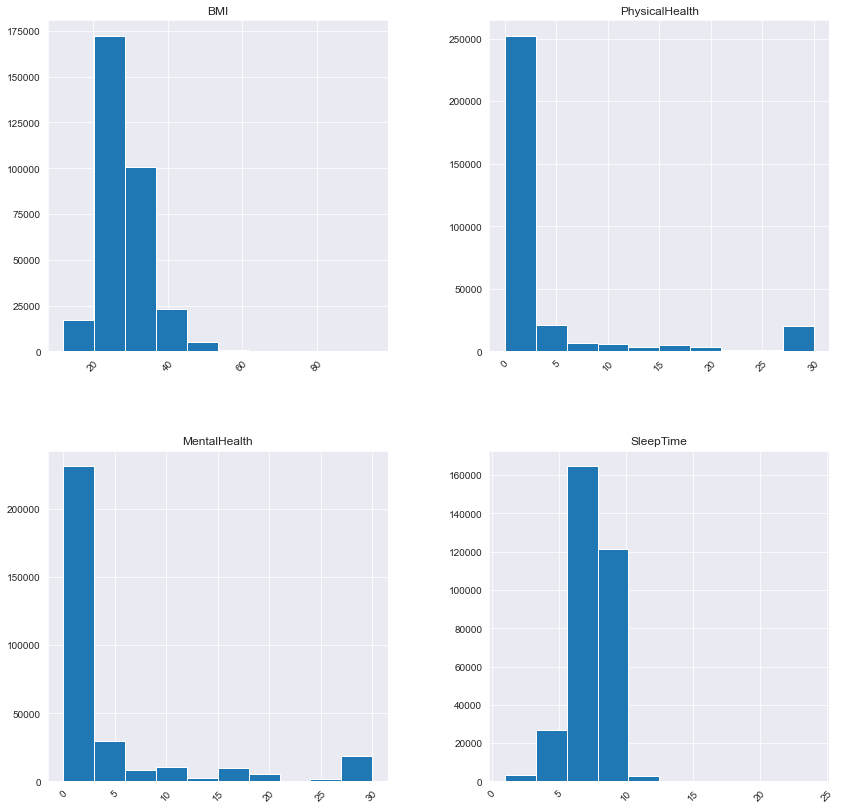

In [12]:
# Numerical Features are represented using hitogram
dataset.hist(figsize=(14,14), xrot=45)
plt.show()

In [13]:
dataset.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


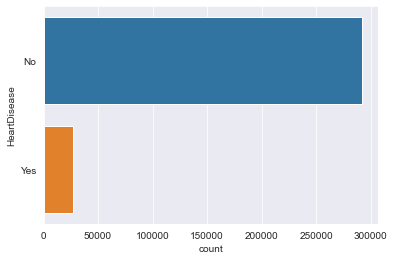

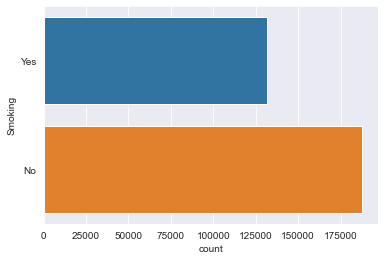

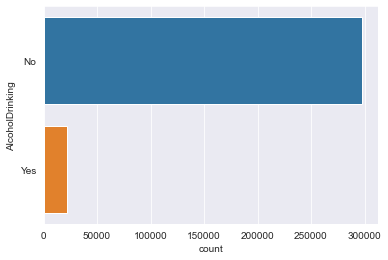

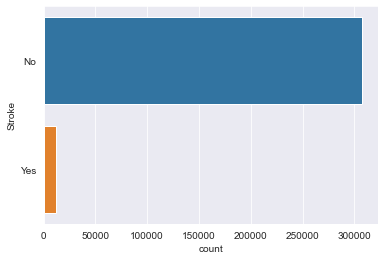

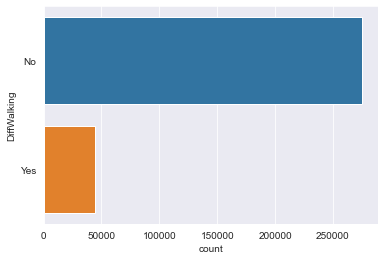

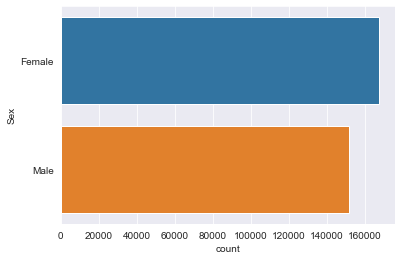

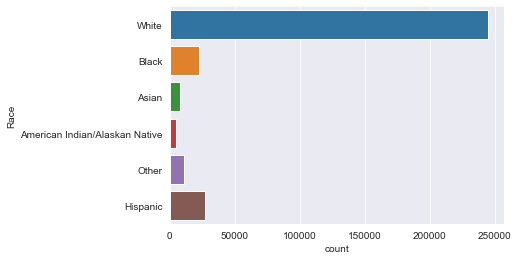

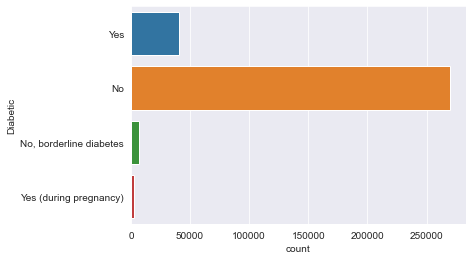

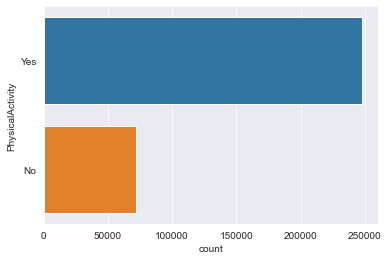

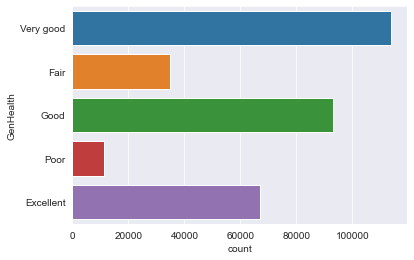

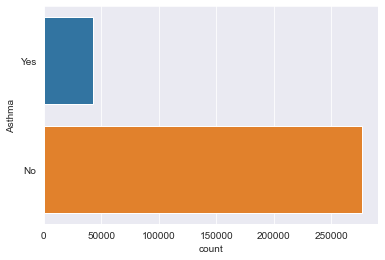

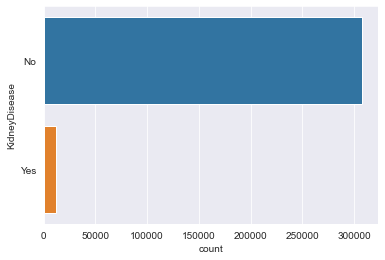

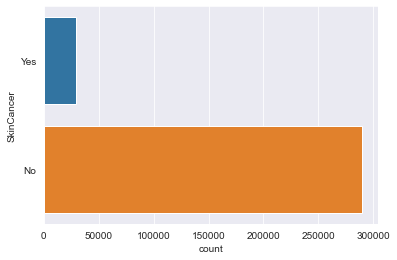

In [14]:
for column in dataset.select_dtypes(include='object'):
    if dataset[column].nunique() < 10:
        sns.countplot(y=column, data=dataset)
        plt.show()

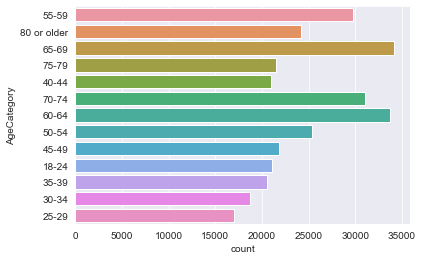

In [15]:
for column in dataset.select_dtypes(include='object'):
    if dataset[column].nunique() > 10:
        sns.countplot(y=column, data=dataset)
        plt.show()

In [16]:
# From all above graphs we can find the distribution of dataset and its frequencies

# Read more to visualize categorical data on both the axis

In [17]:
for column in dataset.select_dtypes(include='object'):
    if dataset[column].nunique() < 10:
        display(dataset.groupby(column).mean())

,BMI,PhysicalHealth,MentalHealth,SleepTime
HeartDisease,,,,
No,28.224658,2.956416,3.828778,7.093416
Yes,29.401592,7.808242,4.641764,7.136156


,BMI,PhysicalHealth,MentalHealth,SleepTime
Smoking,,,,
No,28.202278,2.603240,3.330741,7.133575
Yes,28.500768,4.466302,4.706879,7.045084


,BMI,PhysicalHealth,MentalHealth,SleepTime
AlcoholDrinking,,,,
No,28.392092,3.408794,3.788087,7.099041
Yes,27.412704,2.864215,5.407540,7.070166


,BMI,PhysicalHealth,MentalHealth,SleepTime
Stroke,,,,
No,28.300559,3.155970,3.825159,7.093690
Yes,28.958727,8.872483,5.764935,7.183362


,BMI,PhysicalHealth,MentalHealth,SleepTime
DiffWalking,,,,
No,27.861671,2.003965,3.412030,7.109886
Yes,31.200961,11.853051,6.914118,7.017631


,BMI,PhysicalHealth,MentalHealth,SleepTime
Sex,,,,
Female,28.162436,3.681225,4.655916,7.118536
Male,28.505317,3.029989,3.061991,7.073380


,BMI,PhysicalHealth,MentalHealth,SleepTime
Race,,,,
American Indian/Alaskan Native,29.627678,4.791042,5.036332,7.056709
Asian,25.218303,1.630640,2.755454,6.918691
Black,30.169993,3.696935,4.211561,6.992763
Hispanic,28.818086,3.227137,4.188297,7.035014
Other,28.748967,4.052343,5.225750,6.860359
White,28.153422,3.354310,3.790924,7.131054


,BMI,PhysicalHealth,MentalHealth,SleepTime
Diabetic,,,,
No,27.754661,2.845535,3.787382,7.096769
"No, borderline diabetes",30.451413,4.529715,4.495945,7.029199
Yes,31.707582,6.660948,4.428410,7.122077
Yes (during pregnancy),28.905569,3.303243,5.558421,6.910512


,BMI,PhysicalHealth,MentalHealth,SleepTime
PhysicalActivity,,,,
No,30.103974,6.802876,5.314374,7.086806
Yes,27.810110,2.377634,3.488121,7.100050


,BMI,PhysicalHealth,MentalHealth,SleepTime
GenHealth,,,,
Excellent,26.099836,0.695341,2.167006,7.205514
Fair,30.646690,10.297258,7.350146,6.928569
Good,29.495961,2.904541,4.064094,7.066327
Poor,30.402139,22.986536,11.886350,6.848791
Very good,27.761608,1.270952,2.935938,7.134501


,BMI,PhysicalHealth,MentalHealth,SleepTime
Asthma,,,,
No,28.094452,3.002853,3.541508,7.124334
Yes,29.817149,5.754269,6.203419,6.920997


,BMI,PhysicalHealth,MentalHealth,SleepTime
KidneyDisease,,,,
No,28.262296,3.150619,3.840369,7.095323
Yes,29.975492,9.153154,5.414976,7.142881


,BMI,PhysicalHealth,MentalHealth,SleepTime
SkinCancer,,,,
No,28.393972,3.265391,3.983602,7.078072
Yes,27.658550,4.405614,3.069486,7.281867


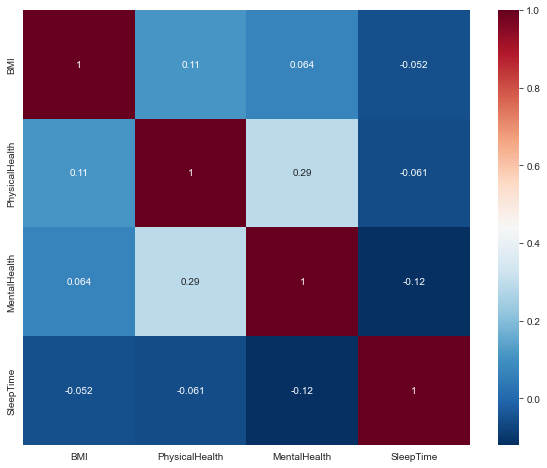

In [18]:
corrs = dataset.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corrs, cmap='RdBu_r', annot=True)
plt.show()

# Data cleaning Phase

In [19]:
df1=dataset.copy()

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le = LabelEncoder()
cls1 = ['HeartDisease','Sex','Race','Smoking', 'AlcoholDrinking', 'Stroke','DiffWalking', 'PhysicalActivity', 'GenHealth',
       'Asthma', 'KidneyDisease', 'SkinCancer','Diabetic','AgeCategory']

In [22]:
for i in cls1:
    df1[i] = le.fit_transform(df1[i])

In [23]:
df1

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,8,3,2,0,1,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,3,3,0,1,4,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,5,3,0,1,2,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,1,3,0,0,2,12.0,0,0,0


In [24]:
cr = df1.corr()
cr

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
HeartDisease,1.000000,0.051803,0.107764,-0.032080,0.196835,0.170721,0.028591,0.201258,0.070040,0.233432,0.034854,0.168553,-0.100030,-0.011062,0.008327,0.041444,0.145197,0.093317
BMI,0.051803,1.000000,0.023118,-0.038816,0.019733,0.109788,0.064131,0.181678,0.026940,-0.004744,-0.037424,0.202472,-0.150616,0.035932,-0.051822,0.092345,0.050768,-0.033644
Smoking,0.107764,0.023118,1.000000,0.111768,0.061226,0.115352,0.085157,0.120074,0.085052,0.128331,0.065499,0.053847,-0.097174,0.020625,-0.030336,0.024149,0.034920,0.033977
AlcoholDrinking,-0.032080,-0.038816,0.111768,1.000000,-0.019858,-0.017254,0.051282,-0.035328,0.004200,-0.059528,0.036702,-0.057372,0.017487,0.001629,-0.005065,-0.002202,-0.028280,-0.005702
Stroke,0.196835,0.019733,0.061226,-0.019858,1.000000,0.137014,0.046467,0.174143,-0.003091,0.137822,-0.003956,0.101518,-0.079455,-0.009335,0.011900,0.038866,0.091167,0.048116
PhysicalHealth,0.170721,0.109788,0.115352,-0.017254,0.137014,1.000000,0.287987,0.428373,-0.040904,0.110763,-0.000847,0.151361,-0.232283,-0.035703,-0.061387,0.117907,0.142197,0.041700
MentalHealth,0.028591,0.064131,0.085157,0.051282,0.046467,0.287987,1.000000,0.152235,-0.100058,-0.155506,-0.014491,0.032945,-0.095808,-0.004412,-0.119717,0.114008,0.037281,-0.033412
DiffWalking,0.201258,0.181678,0.120074,-0.035328,0.174143,0.428373,0.152235,1.000000,-0.068860,0.243263,-0.015831,0.205502,-0.278524,-0.043552,-0.022216,0.103222,0.153064,0.064840
Sex,0.070040,0.026940,0.085052,0.004200,-0.003091,-0.040904,-0.100058,-0.068860,1.000000,-0.067478,0.018855,-0.013456,0.048247,-0.010283,-0.015704,-0.069191,-0.009084,0.013434
AgeCategory,0.233432,-0.004744,0.128331,-0.059528,0.137822,0.110763,-0.155506,0.243263,-0.067478,1.000000,0.163090,0.193745,-0.121687,0.044427,0.104953,-0.058108,0.123190,0.263537


<AxesSubplot:>

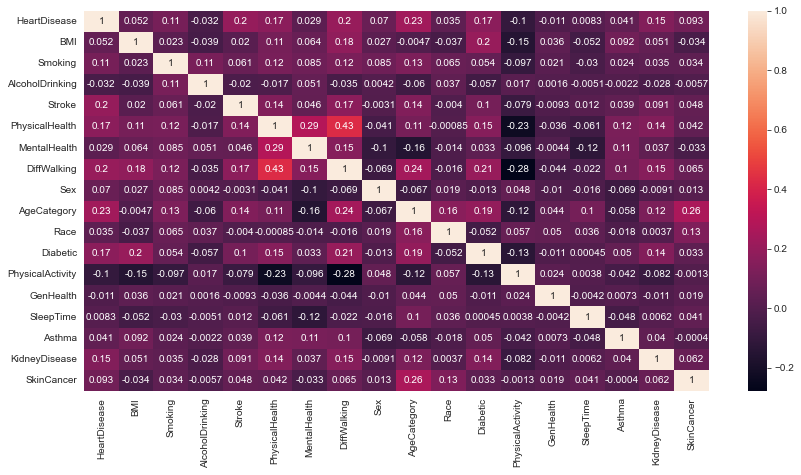

In [25]:
plt.figure(figsize=(14,7))
sns.heatmap(cr,annot=True)

SPLITTING THE DATA TO TRAINING AND TESTING

In [26]:
x = df1.drop(['GenHealth','SleepTime','HeartDisease'],axis=1)
y = df1["HeartDisease"]

In [27]:
x

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,1,0,1
1,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,0,0,0
2,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,0,0
3,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,0,0,1
4,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,1,0,0,7.0,0.0,1,1,8,3,2,0,1,0,0
319791,29.84,1,0,0,0.0,0.0,0,1,3,3,0,1,1,0,0
319792,24.24,0,0,0,0.0,0.0,0,0,5,3,0,1,0,0,0
319793,32.81,0,0,0,0.0,0.0,0,0,1,3,0,0,0,0,0


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=12)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score

In [31]:
model_logistic = LogisticRegression()
model_random = RandomForestClassifier()
model_dt = DecisionTreeClassifier()
model_knn = KNeighborsClassifier()    

In [32]:
models = [model_dt,model_knn,model_logistic,model_random]
x = {}
for i in models:
    i.fit(X_train,y_train)
    ypred = i.predict(X_test)
    print(i,"accuracy score is : ",accuracy_score(ypred,y_test))
    print(classification_report(ypred,y_test))
    print("--------------------------------------------------------------")
    print("---------------------------------------------------------------")

DecisionTreeClassifier() accuracy score is :  0.8694319798620992
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     58774
           1       0.21      0.22      0.22      5185

    accuracy                           0.87     63959
   macro avg       0.57      0.57      0.57     63959
weighted avg       0.87      0.87      0.87     63959

--------------------------------------------------------------
---------------------------------------------------------------
KNeighborsClassifier() accuracy score is :  0.9066276833596523
              precision    recall  f1-score   support

           0       0.98      0.92      0.95     62625
           1       0.08      0.31      0.12      1334

    accuracy                           0.91     63959
   macro avg       0.53      0.61      0.54     63959
weighted avg       0.97      0.91      0.93     63959

--------------------------------------------------------------
----------------------------

Logistic regression has got the highest accuracy but precision , recall and f1-score clearly shows that model is biased towards the class 0 (heart disease = NO)

# OVER SAMPLING

In [33]:
df_cls_1 = df1[df1["HeartDisease"]==1]
df_cls_0 = df1[df1["HeartDisease"]==0]

In [34]:
df_cls_1_ovr = df_cls_1.sample(292422,replace=True)

In [35]:
df_test = pd.concat([df_cls_0,df_cls_1_ovr],axis=0)

In [36]:
x = df_test.drop(['GenHealth','SleepTime','HeartDisease'],axis=1)
y = df_test["HeartDisease"]

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=27)

In [47]:
model_logistic1 = LogisticRegression()

In [51]:
model_logistic1.fit(X_train,Y_train)
y_pred = model_logistic1.predict(X_test)

In [52]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.74      0.75     72964
           1       0.75      0.76      0.75     73247

    accuracy                           0.75    146211
   macro avg       0.75      0.75      0.75    146211
weighted avg       0.75      0.75      0.75    146211



In [53]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
#Create an instance
classifier = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='not majority',
                                replacement=False,
                                random_state=42)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)

In [54]:
print('Accuracy of BalancedBaggingClassifier in DecisionTree on Test Set:',((classifier.score(X_test, Y_test))*100))

Accuracy of BalancedBaggingClassifier in DecisionTree on Test Set: 94.44706622620733


In [55]:
print('Accuracy of BalancedBaggingClassifier in DecisionTree on Train Set:',((classifier.score(X_train,Y_train))*100))

Accuracy of BalancedBaggingClassifier in DecisionTree on Train Set: 97.65361931272841


In [56]:
print(pd.DataFrame(y_pred))
pd.value_counts(y_pred)

        0
0       1
1       1
2       0
3       0
4       0
...    ..
146206  1
146207  0
146208  1
146209  1
146210  0

[146211 rows x 1 columns]


1    79434
0    66777
dtype: int64

In [57]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94     72964
           1       0.91      0.99      0.95     73247

    accuracy                           0.94    146211
   macro avg       0.95      0.94      0.94    146211
weighted avg       0.95      0.94      0.94    146211



In [58]:
 input_data=(16.60,1,0,0,3,30,0,0,7,5,2,1,1,0,0)

 #change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)
 #reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction =classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print('The person does not have a Heart disease')
else:
    print('The person have does have a Heart disease') 

[0]
The person does not have a Heart disease


In [59]:
import pickle

In [45]:
filename= 'trained_model_s.sav'
pickle.dump(classifier,open(filename,'wb'))

In [46]:
# loading the save model
loaded_model_s = pickle.load(open('trained_model_s.sav','rb'))